N 端原子索引: 0, C 端原子索引: 405


/ext3/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36317 (\N{CJK UNIFIED IDEOGRAPH-8DDD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/ext3/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 31163 (\N{CJK UNIFIED IDEOGRAPH-79BB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/ext3/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 31471 (\N{CJK UNIFIED IDEOGRAPH-7AEF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/ext3/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21040 (\N{CJK UNIFIED IDEOGRAPH-5230}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/ext3/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21644 (\N{CJK UNIFIED IDEOGRAPH-548C}) missing from current font.
  fig.canvas.print_fig

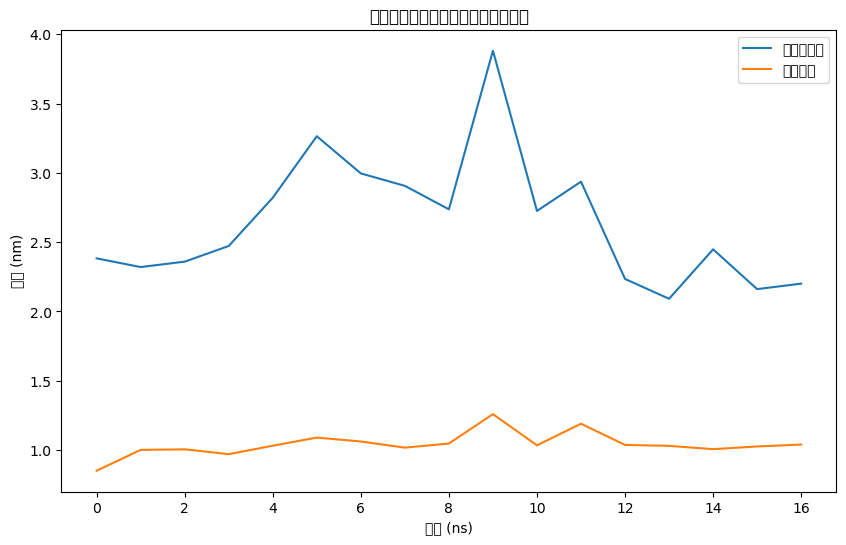

/state/partition1/job-50924626/ipykernel_2771635/795011189.py:50: UserWarning: Glyph 31471 (\N{CJK UNIFIED IDEOGRAPH-7AEF}) missing from current font.
  plt.tight_layout()
/state/partition1/job-50924626/ipykernel_2771635/795011189.py:50: UserWarning: Glyph 21040 (\N{CJK UNIFIED IDEOGRAPH-5230}) missing from current font.
  plt.tight_layout()
/state/partition1/job-50924626/ipykernel_2771635/795011189.py:50: UserWarning: Glyph 36317 (\N{CJK UNIFIED IDEOGRAPH-8DDD}) missing from current font.
  plt.tight_layout()
/state/partition1/job-50924626/ipykernel_2771635/795011189.py:50: UserWarning: Glyph 31163 (\N{CJK UNIFIED IDEOGRAPH-79BB}) missing from current font.
  plt.tight_layout()
/state/partition1/job-50924626/ipykernel_2771635/795011189.py:50: UserWarning: Glyph 27010 (\N{CJK UNIFIED IDEOGRAPH-6982}) missing from current font.
  plt.tight_layout()
/state/partition1/job-50924626/ipykernel_2771635/795011189.py:50: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from cur

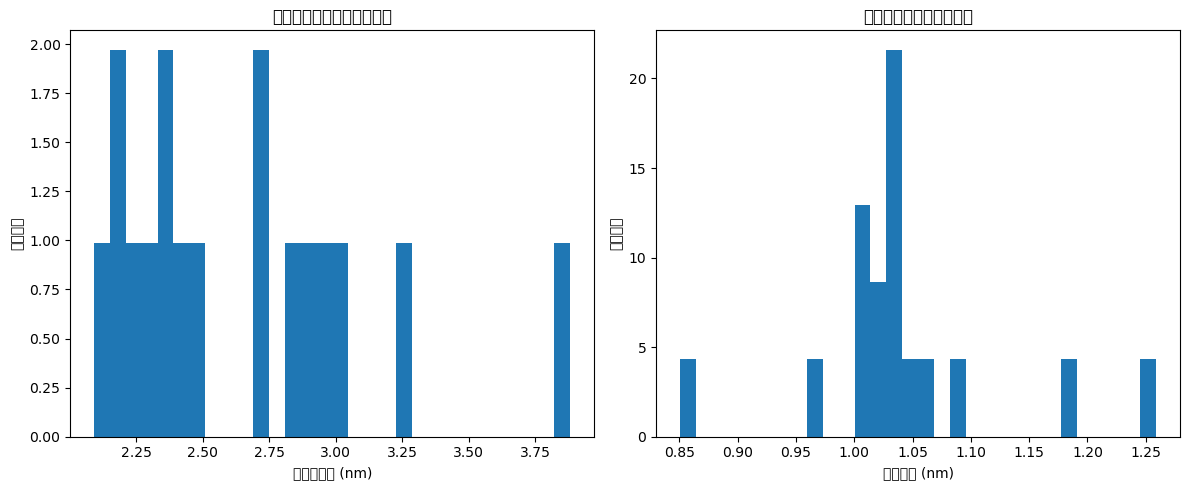

In [2]:
# 导入必要的库
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# 第 a 步) 加载 beta 淀粉样蛋白的分子动力学轨迹
trajectory_file = './1hz3_T310.stepid25000000.every100ps.nowater.xtc'  # 替换为实际轨迹文件路径
topology_file = './1hz3_T310.start.nowater.gro'      # 替换为实际拓扑文件路径
trajectory = md.load(trajectory_file, top=topology_file)

# 检查拓扑结构以找到 N 端和 C 端原子
# 通常，N 端原子是拓扑结构中的第一个氮原子（N），而 C 端原子是最后一个碳原子（C）
topology = trajectory.topology
n_terminal_index = [atom.index for atom in topology.atoms if atom.name == 'N'][0]  # 第一个 'N' 原子的索引
c_terminal_index = [atom.index for atom in topology.atoms if atom.name == 'C'][-1]  # 最后一个 'C' 原子的索引

print(f"N 端原子索引: {n_terminal_index}, C 端原子索引: {c_terminal_index}")

# 第 b 步) 计算每个时间步的端到端距离和回转半径
end_to_end_distances = md.compute_distances(trajectory, [[n_terminal_index, c_terminal_index]])
radius_of_gyration = md.compute_rg(trajectory)

# 第 c 步) 绘制端到端距离和回转半径随时间的变化曲线
time = trajectory.time / 1000  # 假设时间单位是皮秒，将其转换为纳秒

plt.figure(figsize=(10, 6))
plt.plot(time, end_to_end_distances, label='端到端距离')
plt.plot(time, radius_of_gyration, label='回转半径')
plt.xlabel('时间 (ns)')
plt.ylabel('距离 (nm)')
plt.title('端到端距离和回转半径随时间的变化')
plt.legend()
plt.show()

# 第 d 步) 绘制端到端距离和回转半径的标准化直方图
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(end_to_end_distances, bins=30, density=True)
plt.xlabel('端到端距离 (nm)')
plt.ylabel('概率密度')
plt.title('端到端距离的标准化直方图')

plt.subplot(1, 2, 2)
plt.hist(radius_of_gyration, bins=30, density=True)
plt.xlabel('回转半径 (nm)')
plt.ylabel('概率密度')
plt.title('回转半径的标准化直方图')

plt.tight_layout()
plt.show()
